# Импорт

In [47]:
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


In [2]:
ship1 = pd.read_csv(r'C:\Users\Natasha\ngwl-predict-customer-churn\shipments\shipments2020-01-01.csv')
ship2 = pd.read_csv(r'C:\Users\Natasha\ngwl-predict-customer-churn\shipments\shipments2020-03-01.csv')
ship3 = pd.read_csv(r'C:\Users\Natasha\ngwl-predict-customer-churn\shipments\shipments2020-04-30.csv')
ship4 = pd.read_csv(r'C:\Users\Natasha\ngwl-predict-customer-churn\shipments\shipments2020-06-29.csv')
all_shipments = pd.concat([ship1, ship2, ship3, ship4])
del ship1, ship2, ship3, ship4

# Создание данных и построение графиков для гипотез

In [143]:
t = all_shipments[['shipment_starts_at','s.order_state']]

In [144]:
t['month'] = pd.to_datetime(t['shipment_starts_at'], errors='coerce').dt.month
print(t.head())

    shipment_starts_at s.order_state  month
0  2020-02-20 07:00:00      complete      2
1  2020-01-03 17:00:00      complete      1
2  2020-02-13 11:00:00      complete      2
3  2020-01-25 18:00:00      complete      1
4  2020-01-07 19:00:00      complete      1


C:\Users\Natasha\AppData\Local\conda\conda\envs\SberMarket\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [145]:
del t['shipment_starts_at']

In [146]:
t['s.order_state']

0         complete
1         complete
2         complete
3         complete
4         complete
            ...   
872753    complete
872754    canceled
872755    canceled
872756    canceled
872757    complete
Name: s.order_state, Length: 2260686, dtype: object

In [147]:
t_pl = t.groupby(['month','s.order_state'])['s.order_state'].count().unstack('s.order_state')

In [148]:
del t_pl['cart']

In [150]:
t_pl.drop(index = 10, inplace=True)

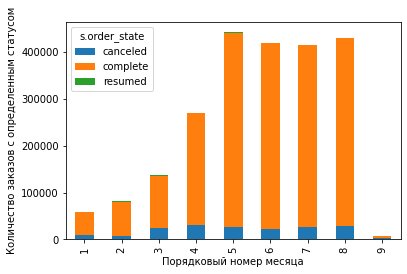

In [151]:
# Количество заказов с определенным статусом по месяцам.
# Мы видим увеличение завершенных заказов и уменьшение отмененных.

t_plots = t_pl.plot(kind = 'bar', stacked = True)
t_plots.set_xlabel('Порядковый номер месяца')
t_plots.set_ylabel('Количество заказов с определенным статусом')

plt.show()

In [112]:
#Посмотрим на количество магазинов по месяцам

In [129]:
r = all_shipments[['retailer','shipment_starts_at']]

In [130]:
r['month'] = pd.to_datetime(r['shipment_starts_at'], errors='coerce').dt.month
print(r.head())

  retailer   shipment_starts_at  month
0    METRO  2020-02-20 07:00:00      2
1    METRO  2020-01-03 17:00:00      1
2    METRO  2020-02-13 11:00:00      2
3    METRO  2020-01-25 18:00:00      1
4    METRO  2020-01-07 19:00:00      1


C:\Users\Natasha\AppData\Local\conda\conda\envs\SberMarket\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [131]:
del r['shipment_starts_at']

In [132]:
r = r.groupby('month')['retailer'].nunique()

In [134]:
r.drop(index = 10, inplace=True)

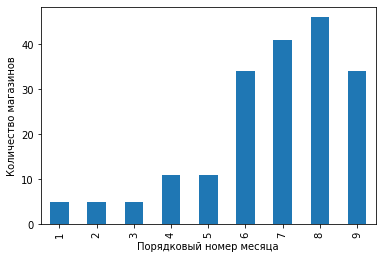

In [157]:
r_pl = r.plot(kind = 'bar')
r_pl.set_xlabel('Порядковый номер месяца')
r_pl.set_ylabel('Количество магазинов')
plt.show()

## Профайлинг в рамках EDA

In [6]:
profile1 = pandas_profiling.ProfileReport(all_shipments)
profile1.to_file("all_shipments.html")

In [8]:
line1 = pd.read_csv(r'C:\Users\Natasha\ngwl-predict-customer-churn\line_items01\line_items_2020-01-01.csv')
line2 = pd.read_csv(r'C:\Users\Natasha\ngwl-predict-customer-churn\line_items01\line_items_2020-01-11.csv')
line3 = pd.read_csv(r'C:\Users\Natasha\ngwl-predict-customer-churn\line_items01\line_items_2020-01-21.csv')
line4 = pd.read_csv(r'C:\Users\Natasha\ngwl-predict-customer-churn\line_items01\line_items_2020-01-31.csv')

all_line = pd.concat([line1, line2, line3, line4])
del line1, line2, line3, line4

In [9]:
all_shipments_and_lines = pd.concat([all_shipments, all_line])
del all_shipments, all_line

In [10]:
profile2 = pandas_profiling.ProfileReport(all_shipments_and_lines)
profile2.to_file("all_shipments_and_lines.html")

C:\Users\Natasha\AppData\Local\conda\conda\envs\SberMarket\lib\site-packages\pandas_profiling\model\correlations.py:107: UserWarning: There was an attempt to calculate the cramers correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"cramers": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'No data; `observed` has size 0.')
  (include the error message: '{error}')"""


In [27]:
all_shipments_and_lines.head()

,user_id,order_id,order_created_at,order_completed_at,retailer,s.order_state,s.city_name,s.store_id,total_cost,rate,...,master_category_id,price,discount,item_id,quantity,product_id,brand_name,pricer,replaced,cancelled
0,11019.0,2156687.0,2017-08-03 21:25:23,2020-02-18 14:07:00,METRO,complete,Москва,21.0,168.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,62278.0,3021953.0,2018-03-02 17:22:04,2020-01-03 13:09:26,METRO,complete,Москва,10.0,98.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,905126.0,3018198.0,2018-02-28 11:32:47,2020-02-12 12:39:28,METRO,complete,Москва,21.0,98.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21412.0,3030227.0,2018-03-07 20:37:27,2020-01-25 11:58:56,METRO,complete,Москва,8.0,158.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,42110.0,2923996.0,2017-12-24 11:19:04,2020-01-07 14:30:44,METRO,complete,Москва,2.0,163.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
del all_shipments_and_lines['os']

In [26]:
all_shipments_and_lines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4500672 entries, 0 to 726008
Data columns (total 23 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             float64
 1   order_id            float64
 2   order_created_at    object 
 3   order_completed_at  object 
 4   retailer            object 
 5   s.order_state       object 
 6   s.city_name         object 
 7   s.store_id          float64
 8   total_cost          float64
 9   rate                float64
 10  promo_total         float64
 11  total_weight        float64
 12  shipped_at          object 
 13  master_category_id  float64
 14  price               float64
 15  discount            float64
 16  item_id             float64
 17  quantity            float64
 18  product_id          float64
 19  brand_name          object 
 20  pricer              object 
 21  replaced            float64
 22  cancelled           float64
dtypes: float64(15), object(8)
memory usage: 824.1+ MB


In [28]:
all_shipments_and_lines['pricer'].unique()

array([nan, 'Pricer::PerItem', 'Pricer::PerPack', 'Pricer::PerPackage',
       'Pricer::PerKilo'], dtype=object)

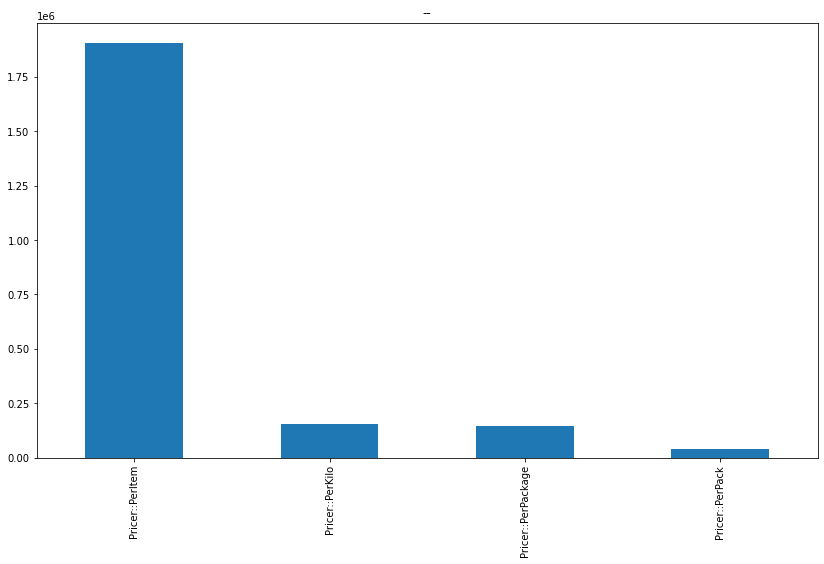

In [32]:
all_shipments_and_lines['pricer'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="--")
plt.show()

In [37]:
temp = all_shipments_and_lines['master_category_id'].value_counts()

In [49]:
temp = temp.head(10)

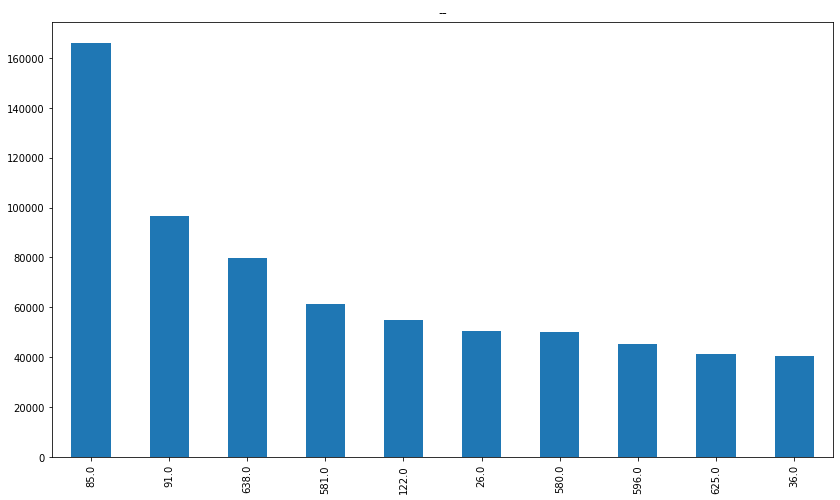

In [50]:
temp.plot(kind='bar',
                                    figsize=(14,8),
                                    title="--")
plt.show()

In [53]:
t = all_shipments_and_lines.groupby('user_id')[['user_id']]
t.first()

,order_id,order_created_at,order_completed_at,retailer,s.order_state,s.city_name,s.store_id,total_cost,rate,promo_total,...,master_category_id,price,discount,item_id,quantity,product_id,brand_name,pricer,replaced,cancelled
user_id,,,,,,,,,,,,,,,,,,,,,
1400.0,9718154.0,2020-05-08 09:46:18,2020-06-11 10:06:40,METRO,complete,Московская Область,87.0,158.0,5.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1459.0,5365003.0,2019-12-19 09:30:43,2020-01-31 16:46:41,METRO,canceled,Москва,12.0,0.0,0.0,-2000.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1540.0,4051322.0,2019-04-28 07:12:02,2020-02-08 23:10:34,METRO,complete,Москва,2.0,158.0,5.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1541.0,10409918.0,2020-05-20 06:32:50,2020-05-20 07:00:29,Ашан,complete,Москва,183.0,163.0,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1577.0,9098652.0,2020-04-27 00:51:34,2020-04-27 02:53:49,METRO,complete,Москва,3.0,158.0,4.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925480.0,15907916.0,2020-08-31 23:04:01,2020-08-31 23:34:59,Ашан,complete,Москва,185.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2925484.0,15907907.0,2020-08-31 23:01:19,2020-08-31 23:33:31,Лента,canceled,Курган,196.0,0.0,0.0,-250.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2925486.0,15908009.0,2020-08-31 23:19:17,2020-08-31 23:23:51,METRO,canceled,Санкт-Петербург,81.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
from datetime import datetime, timedelta

In [66]:
type(all_shipments_and_lines['order_completed_at'])

pandas.core.series.Series

In [67]:
all_shipments_and_lines['duration'] = pd.to_datetime(all_shipments_and_lines.order_created_at, format='%Y-%m-%d %H:%M:%S') - pd.to_datetime(all_shipments_and_lines.order_completed_at, format='%Y-%m-%d %H:%M:%S')

In [68]:
all_shipments_and_lines['duration']

0        -929 days +07:18:23
1        -672 days +04:12:38
2        -715 days +22:53:19
3        -689 days +08:38:31
4        -745 days +20:48:20
                 ...        
726004                   NaT
726005                   NaT
726006                   NaT
726007                   NaT
726008                   NaT
Name: duration, Length: 4500672, dtype: timedelta64[ns]

In [12]:
data_messages = pd.read_csv(r'C:\Users\Natasha\ngwl-predict-customer-churn\messages\messages.csv')
data_messages.head(30)

,sent,action_id,user_id
0,1.588847e+09,1512.0,1775692
1,1.588847e+09,1512.0,1775687
2,1.588847e+09,1512.0,1775684
3,1.588847e+09,1512.0,1775678
4,1.588847e+09,1512.0,1775660
5,1.588847e+09,1512.0,1775657
6,1.588847e+09,1512.0,1775656
7,1.588847e+09,1512.0,1775654
8,1.588847e+09,1512.0,1775647
9,1.588847e+09,1512.0,1775638


In [23]:
data_shipments = pd.read_csv(r'C:\Users\Natasha\ngwl-predict-customer-churn\shipments\shipments2020-04-30.csv')
data_shipments.head(30)

,user_id,ship_address_id,shipment_id,order_id,order_created_at,order_completed_at,shipment_starts_at,retailer,s.order_state,shipment_state,s.city_name,s.store_id,total_cost,rate,dw_kind,promo_total,total_weight,platform,os,shipped_at
0,1880213,119282,273988,2716025,2017-10-15 05:58:30,2020-05-17 13:51:21,2020-05-18 06:00:00,METRO,complete,shipped,Москва,1,423.0,0,courier,0.0,88925,app,ios,2020-05-18 08:11:48
1,44708,166772,337809,2895562,2017-12-01 13:10:12,2020-05-05 12:48:48,2020-05-06 05:00:00,METRO,complete,shipped,Москва,11,0.0,0,courier,0.0,17110,web,linux,2020-05-06 06:52:10
2,53887,158025,351762,2961482,2018-01-28 13:49:33,2020-06-04 22:38:37,2020-06-05 09:00:00,METRO,complete,shipped,Москва,11,98.0,0,courier,-300.0,27310,web,windows,2020-06-05 10:17:31
3,54389,223102,354106,2965140,2018-01-31 11:48:22,2020-05-10 13:36:44,2020-05-11 08:00:00,METRO,complete,shipped,Москва,14,0.0,0,courier,0.0,13452,web,windows,2020-05-11 10:19:51
4,57748,155940,368687,2988953,2018-02-14 09:10:43,2020-05-30 22:43:28,2020-06-01 09:00:00,METRO,complete,shipped,Москва,21,98.0,0,courier,0.0,25452,web,windows,2020-06-01 10:40:35
5,61320,587981,384281,3016088,2018-02-27 12:12:44,2020-05-29 07:33:09,2020-05-29 10:00:00,METRO,complete,shipped,Москва,11,98.0,5,courier,-250.0,12575,app,ios,2020-05-29 12:59:42
6,68536,332565,417486,3066629,2018-03-31 08:55:45,2020-05-04 20:58:57,2020-05-05 10:00:00,METRO,complete,shipped,Москва,1,278.0,1,courier,0.0,37455,web,windows,2020-05-05 11:03:37
7,53608,169227,420286,2959241,2018-01-26 16:41:42,2020-05-29 11:11:09,2020-05-29 14:00:00,METRO,complete,shipped,Москва,9,0.0,5,courier,0.0,13200,web,windows,2020-05-29 15:05:44
8,70798,346249,439430,3082255,2018-04-10 08:14:45,2020-06-07 05:35:39,2020-06-07 08:00:00,METRO,complete,shipped,Москва,10,158.0,0,courier,0.0,27587,web,windows,2020-06-07 09:05:51
9,84472,395337,451100,3114508,2018-04-26 09:05:31,2020-05-06 09:43:50,2020-05-06 14:00:00,METRO,complete,shipped,Москва,10,98.0,5,courier,0.0,3848,app,ios,2020-05-06 14:25:39


In [24]:
data_shipments.order_completed_at.min()

'2020-04-29 21:00:13'

In [25]:
data_shipments.order_completed_at.max()

'2020-06-28 20:59:48'

In [33]:
data_shipments.groupby(["user_id", "s.order_state"]).agg({
  "s.order_state": "count"

}).reset_index()

,user_id,s.order_state
0,1400,1
1,1459,9
2,1541,1
3,1577,3
4,1670,3
...,...,...
318114,2267474,1
318115,2267483,1
318116,2267484,1
318117,2267493,1


In [29]:
data_shipments.loc[data_shipments['s.order_state'] == 'complete', 'user_id'].count()

796134